![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #02 | Why gender was the most important factor to survive the Titanic

![](src/tree.jpg)

Learn how to develop a Decision Tree Classifier in Python to understand why gender was the most important factor to survive the Titanic accident.

## Introduction to Supervised Classification Models

Machine Learning is a field that focuses on [**getting a mathematical equation**](https://twitter.com/sotastica/status/1449735653328031745) to make predictions about the future. Although not all Machine Learning models work the same way.

Which types of Machine Learning models can we distinguish so far?

- **Classifiers** to predict **Categorical Variables**
- **Regressors** to predict **Numerical Variables**

The previous chapter covered the explanation of a Regressor model: the Linear Regression.

This chapter covers the explanation of a Classification model: the Decision Tree.

Why do they belong to Machine Learning?

- The Machine wants to get the best numbers of a mathematical equation such that **the difference between reality and predictions is minimum**:

    - **Classifier** evaluates the model based on **prediction success rate**
        $$
        y \stackrel{?}{=} \hat y
        $$
    - **Regressor** evaluates the model based on the **distance between real data and predictions** (residuals) 
        $$
        y - \hat y
        $$

There are many Machine Learning Models of each type.

You don't need to know the process behind each model because they all work the same way (see article). In the end, you will choose the one makes better predictions.

This tutorial will show you how to develop a Decision Tree to calculate the probability of a person to survive the Titanic and the different evaluation metrics we can calculate on Classification Models.

**Table of Important Content**

1. 🛀 [How to preprocess/clean the data to fit a Machine Learning model?](#Data-Preprocessing)
    - Dummy Variables
    - Missing Data
2. 🤩 [How to **visualize** a Decision Tree model in Python step by step?](#Model-Visualization)
3. 🤔 [How to **interpret** the nodes and leafs values of a Decision Tree plot?](#Model-Interpretation)
4. ⚠️ How to **evaluate** Classification models?
    - [Accuracy](#Model's-Score)
    - [Confussion Matrix](#The-Confusion-Matrix-to-compute-Other-Classification-Metrics)
        - Sensitivity
        - Specificity
        - ROC Curve
5. 🏁 [How to compare Classification models to choose the best one?](#Which-One-Is-the-Best-Model?-Why?)

## Load the Data

- This dataset represents **people** (rows) aboard the Titanic
- And their **sociological characteristics** (columns)

In [2]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic')[['survived', 'sex', 'age', 'embarked', 'class']]
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
...,...,...,...,...,...
889,1,male,26.0,C,First
890,0,male,32.0,Q,Third


## How do we compute a Decision Tree Model in Python?

We should know from the previous chapter that we need function which is accessible from a Class in the library `sklearn`.

### Import the Class

In [3]:
from sklearn.tree import DecisionTreeClassifier

### Instantiante the Class

To create a copy of the original's code blueprint in order to not "modify" the source code.

In [4]:
model_dt = DecisionTreeClassifier()

### Access the Function

The theoretical action we'd like to perform is the same we executed in the previous chapter. Therefore, the function should be called the same way:

In [5]:
model_dt.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

Why is it asking for two parameters: `y` and `X`?

- `y`: target ~ independent ~ label ~ class variable
- `X`: explanatory ~ dependent ~ feature variables

### Separate the Variables

In [6]:
target = df_titanic['survived']
explanatory = df_titanic.drop(columns='survived')

### Fit the Model

In [7]:
model_dt.fit(X=explanatory, y=target)

ValueError: could not convert string to float: 'male'

Most of the time, the data isn't prepared to fit the model. Let's dig in why we get the previous error in the next sections.

## Data Preprocessing

The error says:
    
```python
ValueError: could not convert string to float: 'male'
```

From which we can interpret that the function `.fit()` does **not accept values of `string` type** like the ones in `sex` column:

In [8]:
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
...,...,...,...,...,...
889,1,male,26.0,C,First
890,0,male,32.0,Q,Third


### Dummy Variables

Therefore, we need to convert the categorical columns to **dummies** (0s & 1s):

In [9]:
pd.get_dummies(df_titanic, drop_first=True)

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


In [10]:
df_titanic = pd.get_dummies(df_titanic, drop_first=True)

We separate the variables again to take into account the latest modification:

In [11]:
explanatory = df_titanic.drop(columns='survived')
target = df_titanic[['survived']]

Now we should be able to fit the model:

In [12]:
model_dt.fit(X=explanatory, y=target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Missing Data

The data passed to the function contains **missing data** (`NaN`). Precisely 177 people from which we don't have the age:

In [13]:
df_titanic.isna()

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False


In [14]:
df_titanic.isna().sum()

survived          0
age             177
sex_male          0
embarked_Q        0
embarked_S        0
class_Second      0
class_Third       0
dtype: int64

Who are the people who lack the information?

In [15]:
mask_na = df_titanic.isna().sum(axis=1) > 0

In [16]:
df_titanic[mask_na]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
5,0,NaN,1,1,0,0,1
17,1,NaN,1,0,1,1,0
...,...,...,...,...,...,...,...
878,0,NaN,1,0,1,0,1
888,0,NaN,0,0,1,0,1


What could we do with them?

1. Drop the people (rows) who miss the age from the dataset.
2. Fill the age by the average age of other combinations (like males who survived)
3. Apply an algorithm to fill them.
    
We'll choose **option 1 to simplify the tutorial**.

Therefore, we go from 891 people:

In [17]:
df_titanic

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


To 714 people:

In [18]:
df_titanic.dropna()

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


In [19]:
df_titanic = df_titanic.dropna()

We separate the variables again to take into account the latest modification:

In [20]:
explanatory = df_titanic.drop(columns='survived')
target = df_titanic['survived']

Now we shouldn't have any more trouble with the data to finally fit the model.

## `DecisionTreeClassifier()` Small Recap

With repect to the Decision Tree object, we have just instantiate the Class. Therefore, the object won't show calculated attributes, just the default ones:

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

### Fit the Model Again

We don't get any error because we correctly preprocess the data for the model.

Once the model is fitted, we may observe that the object contains more attributes because it has calculated best numbers for the mathematical equation.

In [22]:
model_dt.fit(X=explanatory, y=target)
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['age', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
        'class_Third'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x16612cce0>}

### Predictions

#### Calculate Predictions

We have a fitted `DecisionTreeClassifier`. Therefore, we should be able to apply the mathematical equation to the original data to get the predictions:

In [23]:
model_dt.predict(X=explanatory)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

#### Add a New Column with the Predictions

Let's create a new `DataFrame` to keep the information of the target and predictions to better understand the topic:

In [24]:
df_pred = df_titanic[['survived']].copy()

And add the predictions:

In [25]:
df_pred['pred_dt'] = model_dt.predict(X=explanatory)
df_pred

,survived,pred_dt
0,0,0
1,1,1
...,...,...
889,1,1
890,0,0


How have we calculated those predictions?

### Model Visualization

The **Decision Tree** model doesn't especifically have a mathematical equation. But rather, a set of conditions represented in a tree:

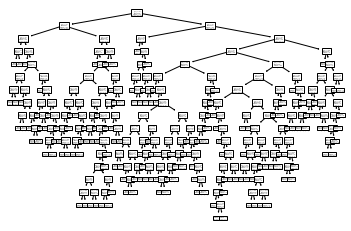

In [26]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt);

There are many conditions, let's recreate a shorter tree to explain the Mathematical Equation of the Decision Tree:

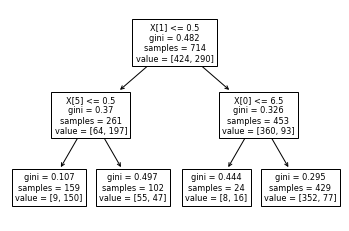

In [27]:
model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(X=explanatory, y=target)

plot_tree(decision_tree=model_dt);

Let's make the image bigger:

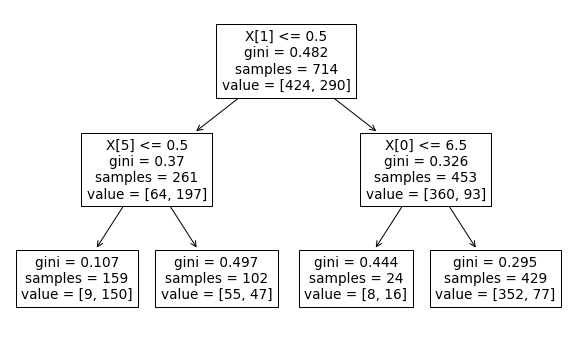

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt);

The conditions are `X[2]<=0.5`. The `X[2]` means the 3rd variable (Python starts counting at 0) of the explanatory ones. If we'd like to see the names of the columns, we need to add the `feature_names` parameter:

In [29]:
explanatory.columns

Index(['age', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
       'class_Third'],
      dtype='object')

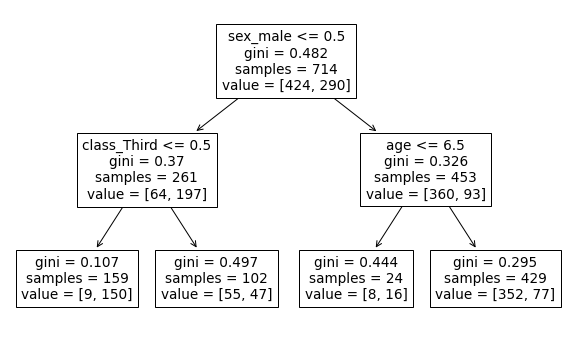

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=explanatory.columns);

Let's add some colours to see how the predictions will go based on the fulfilled conditions:

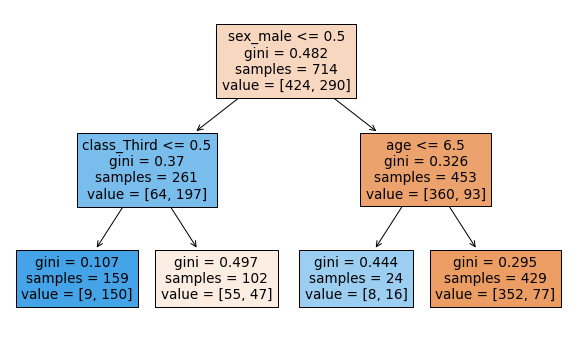

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=explanatory.columns, filled=True);

### How does the Decision Tree Algorithm computes the Mathematical Equation?

The Decision Tree, as well as the Linear Regression algorithms, look for the best numbers in a mathematical equation. The following video explains how the Decision Tree configures the equation:

In [32]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_L39rN6gz7Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Model Interpretation

Let's take a person from the data to explain how the model makes a prediction. For the sake of storytelling, let's say the name of the person is John.

John is a 22 year old men who took the titanic on 3rd class, but didn't survive:

In [33]:
df_titanic[:1]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1


To calculate the chances of survival in a person like John, we pass the explanatory variables of John:

In [51]:
explanatory[:1]

,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,1,0,1


To the function `.predict_proba()` and get a probability of 17.94%:

In [53]:
model_dt.predict_proba(X=explanatory[:1])

array([[0.82051282, 0.17948718]])

But wait, how did we get to thr probability of survival 17.94%?

Let's explain it step-by-step with the Decision Tree visualization:

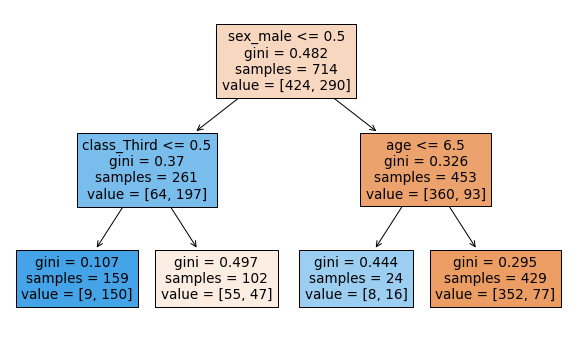

In [54]:
plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=explanatory.columns, filled=True);

Based on the tree the conditions are:

#### 1st condition

- sex_male (John=1) <= 0.5 ~ False

John doesn't fulfill the condition, we move to the right side of the tree.

#### 2nd condition

- age (John=22.0) <= 6.5 ~ False

John doesn't fulfill the condition, we move to the right side of the tree.

#### Leaf

The ultimate node, the leaf, tells us that the training dataset contained 429 males with an age greater than 6.5 years old.

Out of the 429, 77 survived, but 352 didn't make it.

Therefore, the chances of John to survive according to our model are 77 divided by 429:

In [36]:
77/429

0.1794871794871795

We get the same probability; John had a 17.94% chance to survive the Titanic accident.

### Model's Score

#### Calculate the Score

As always, we should have a function to calculate the goodness of the model:

In [37]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

The model is able to predict correctly 80.25% of the people in the dataset.

What's the reasoning behind the model's evaluation?

#### [ ] The Score Step-by-step

As we saw [earlier](#Leaf), the classification model calculates the probability for an event to occur. The function `.predict_proba()` gives us two probabilities in the columns: people who didn't survived (0) and people who survived (1).

In [38]:
model_dt.predict_proba(X=explanatory)[:5]

array([[0.82051282, 0.17948718],
       [0.05660377, 0.94339623],
       [0.53921569, 0.46078431],
       [0.05660377, 0.94339623],
       [0.82051282, 0.17948718]])

We take the positive probabilities in the second column:

In [39]:
df_pred['pred_proba_dt'] = model_dt.predict_proba(X=explanatory)[:, 1]

At the time to compare reality (0s and 1s) with the predictions (probabilities), we need to turn probabilities higher than 0.5 into 1, and 0 otherwise.

In [40]:
import numpy as np

df_pred['pred_dt'] = np.where(df_pred.pred_proba_dt > 0.5, 1, 0)
df_pred

,survived,pred_dt,pred_proba_dt
0,0,0,0.179487
1,1,1,0.943396
...,...,...,...
889,1,0,0.179487
890,0,0,0.179487


The simple idea of the accuracy is to get the success rate on the classification: how many people we got right?

We compare if the reality is equal to the prediction:

In [41]:
comp = df_pred.survived == df_pred.pred_dt
comp

0       True
1       True
       ...  
889    False
890     True
Length: 714, dtype: bool

If we sum the boolean Series, Python will take True as 1 and 0 as False to compute the number of correct classifications:

In [42]:
comp.sum()

573

We get the score dividing the successes by all posibilities (the total number of people):

In [43]:
comp.sum()/len(comp)

0.8025210084033614

It is also correct to do the mean on the comparisons because it's the sum divided by the total. Observe how you get the same number:

In [44]:
comp.mean()

0.8025210084033614

But it's definitely more efficient to calculate this metric with the function `.score()`:

In [45]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

### The Confusion Matrix to Compute Other Classification Metrics

Can we think that our model is 80.25% of good and be happy with it?

- We should not, because we might be interested on the accuracy of each class (survived or not) separatedly. But first, we need to compute the confussion matrix:

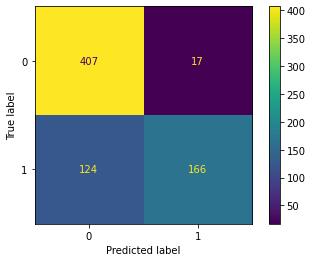

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

CM = ConfusionMatrixDisplay(cm)
CM.plot();

1. Looking at the first number of the confusion matrix, we have 407 people who didn't survived the Titanic in reality and in the predictions.
2. It is not the case with the following number: 17. Our model classified 17 people as survivors when they didn't.
3. The success rate of the negative class, people who didn't survive, is called the **specificity**: $407/(407+17)$.
4. Whereas the success rate of the positive class, people who did survive, is called the **sensitivity**: $166/(166+124)$.

#### Specificity (Recall=0)

In [47]:
cm[0,0]

407

In [48]:
cm[0,:]

array([407,  17])

In [49]:
cm[0,0]/cm[0,:].sum()

0.9599056603773585

In [223]:
sensitivity = cm[0,0]/cm[0,:].sum()

#### Sensitivity (Recall=1)

In [224]:
cm[1,1]

166

In [225]:
cm[1,:]

array([124, 166])

In [226]:
cm[1,1]/cm[1,:].sum()

0.5724137931034483

In [227]:
sensitivity = cm[1,1]/cm[1,:].sum()

#### Classification Report

We could have gotten the same metrics by using the function `classification_report()`. Look a the recall (column) of the rows 0 and 1, specificity and sensitivity, respectively:

In [228]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

print(report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       424
           1       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714



We can could also create a nice `DataFrame` to later use the data for simulations:

In [229]:
report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt,
    output_dict=True
)

pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.766478,0.907104,0.802521,0.836791,0.823595
recall,0.959906,0.572414,0.802521,0.766160,0.802521
f1-score,0.852356,0.701903,0.802521,0.777129,0.791248
support,424.000000,290.000000,0.802521,714.000000,714.000000


Our model is not as good as we thought in the case we are predicting the people who survived; we just get 57.24% survivors right.

How can we then assess a good rate to our model?

#### ROC Curve

Watch the following video to understand how the Area Under the Curve (AUC) is a good metric because it sort of combines accuracy, specificity and sensitivity:

In [230]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We compute this metric in Python as follows:

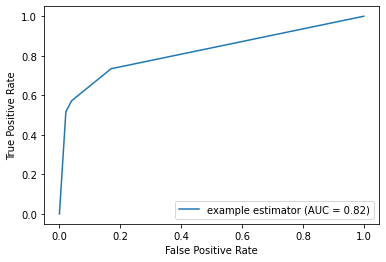

In [231]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

y = df_pred.survived
pred = model_dt.predict_proba(X=explanatory)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [232]:
roc_auc

0.8205066688353937

## Other Classification Models

Let's build other classification models by applying the same functions. In the end, computing [Machine Learning models is the same thing all the time](https://blog.resolvingpython.com/why-all-machine-learning-models-are-the-same).

### `RandomForestClassifier()` in Python

#### Fit the Model

In [233]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X=explanatory, y=target)

RandomForestClassifier()

#### Calculate Predictions

In [234]:
df_pred['pred_rf'] = model_rf.predict(X=explanatory)
df_pred

,survived,pred_dt,pred_proba_dt,pred_rf
0,0,0,0.179487,0
1,1,1,0.943396,1
...,...,...,...,...
889,1,0,0.179487,1
890,0,0,0.179487,0


#### Model's Score

In [235]:
model_rf.score(X=explanatory, y=target)

0.9117647058823529

### `SVC()` in Python

#### Fit the Model

In [236]:
from sklearn.svm import SVC

model_sv = SVC()
model_sv.fit(X=explanatory, y=target)

SVC()

#### Calculate Predictions

In [237]:
df_pred['pred_sv'] = model_sv.predict(X=explanatory)
df_pred

,survived,pred_dt,pred_proba_dt,pred_rf,pred_sv
0,0,0,0.179487,0,0
1,1,1,0.943396,1,0
...,...,...,...,...,...
889,1,0,0.179487,1,0
890,0,0,0.179487,0,0


#### Model's Score

In [238]:
model_sv.score(X=explanatory, y=target)

0.6190476190476191

## Which One Is the Best Model? Why?

To simplify the explanation, we use the accuracy as the metric to compare the models. We have the Random Forest to be the best model with an accuracy of 91.17%.

In [239]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

In [240]:
model_rf.score(X=explanatory, y=target)

0.9117647058823529

In [241]:
model_sv.score(X=explanatory, y=target)

0.6190476190476191

In [242]:
df_pred.head(10)

,survived,pred_dt,pred_proba_dt,pred_rf,pred_sv
0,0,0,0.179487,0,0
1,1,1,0.943396,1,0
2,1,0,0.460784,1,0
3,1,1,0.943396,1,0
4,0,0,0.179487,0,0
6,0,0,0.179487,0,0
7,0,1,0.666667,0,1
8,1,0,0.460784,1,0
9,1,1,0.943396,1,0
10,1,0,0.460784,1,1


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.